# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [32]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import os
from pprint import pprint
import random

# Import API key
from api_keys import api_key

# Output File (CSV)
output_data_file = "output_data/cities.csv"

df=pd.read_csv(output_data_file)

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

df

FileNotFoundError: File b'output_data/cities.csv' does not exist

In [13]:
#Generate 500 random cities
#Generate 500 random latitudes and longitudes numbers and then use citypy to fin dthe nearest city to those coordinates

from citipy import citipy

#Create lists to store cities and countries
random_cities = []
random_countries = []
loop_count = 0


## Generate Cities List

In [30]:
#Generate 500 random cities
#Generate 500 random latitudes and longitudes numbers and then use citypy to fin dthe nearest city to those coordinates

# from citypy import citypy

#Create lists to store cities and countries
random_cities = []
random_countries = []
loop_count = 0

#Create a Loop to find 500 unique cities
while len(random_cities)<500:
    loop_count +=1
    
    latitude_postion = random.randint (0,2)
    base_latitude = random.randint (0,90)
    decimal_latitude = random.random()/100
    latitude = base_latitude + decimal_latitude
    
    longitude_position = random.randint (0,2)
    base_longitude = random.randint (0,180)
    decimal_longitude = random.random()/100
    longitude = base_longitude + decimal_longitude

    city = citipy.nearest_city(latitude, longitude)
    
 # Checking to see if city is unique -- Had trouble with this
 # If the city is unique, then add it to a our cities list  
    if city not in random_cities:
        random_cities.append(city)

# Print the city count to confirm sufficient count
print(len(random_cities))

random_cities[0]

500


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name)


In [29]:
# Build query Url
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

query_url = base_url + "appid=" + api_key + "&units=" + units + "&q="

#Perfrom a loop through the random_cities list and perform request for data for each city in the list
search_data = []
city_list = []
country_list = []

search_count = 0

print(f"Start of API Call to Openweather Database")

for city in random_cities:
    search_count +=1
    
    print(f"Processing request number {search_count} for city {city}.")
    
    response = requests.get(query_url).json()
    search_city_ID = response.get("id")
#     if response["coord"]["lat"]:
#         print (f"Records found for city:{city}, cityID = {search_city_ID}")
#         search_data.append(response)
#         city_list.append(city)
#     else:
#         print (f".  No recordss found for city:{city}.")

# print(f"End of API Call to Openweather Database")
print(response)


Start of API Call to Openweather Database
Processing request number 1 for city <citipy.citipy.City object at 0x1167329b0>.
Processing request number 2 for city <citipy.citipy.City object at 0x1165a4898>.
Processing request number 3 for city <citipy.citipy.City object at 0x116524fd0>.
Processing request number 4 for city <citipy.citipy.City object at 0x115c49860>.
Processing request number 5 for city <citipy.citipy.City object at 0x114f44c88>.
Processing request number 6 for city <citipy.citipy.City object at 0x11665d9e8>.
Processing request number 7 for city <citipy.citipy.City object at 0x102453128>.
Processing request number 8 for city <citipy.citipy.City object at 0x115e29f98>.
Processing request number 9 for city <citipy.citipy.City object at 0x11584a5f8>.
Processing request number 10 for city <citipy.citipy.City object at 0x1166087f0>.
Processing request number 11 for city <citipy.citipy.City object at 0x1164c4ba8>.
Processing request number 12 for city <citipy.citipy.City object 

Processing request number 101 for city <citipy.citipy.City object at 0x1165dd4a8>.
Processing request number 102 for city <citipy.citipy.City object at 0x1165a4a58>.
Processing request number 103 for city <citipy.citipy.City object at 0x1166222e8>.
Processing request number 104 for city <citipy.citipy.City object at 0x116600e48>.
Processing request number 105 for city <citipy.citipy.City object at 0x116562ba8>.
Processing request number 106 for city <citipy.citipy.City object at 0x115c5cda0>.
Processing request number 107 for city <citipy.citipy.City object at 0x116573518>.
Processing request number 108 for city <citipy.citipy.City object at 0x115e06f60>.
Processing request number 109 for city <citipy.citipy.City object at 0x115ea3c88>.
Processing request number 110 for city <citipy.citipy.City object at 0x11643ea20>.
Processing request number 111 for city <citipy.citipy.City object at 0x1163edc88>.
Processing request number 112 for city <citipy.citipy.City object at 0x116542be0>.
Proc

KeyboardInterrupt: 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [24]:
#print(json.dumps(search_data[2], indent=4))
len(search_data)

## somwthing is definitely wrong !

0

In [19]:
# Use list comprehension to gather necessary data series

lat_data = [data.get("coord").get("lat") for data in search_data]
lng_data = [data.get("coord").get("lon") for data in search_data]
temp_data = [data.get("main").get("temp") for data in search_data]
humid_data = [data.get("main").get("humidity") for data in search_data]
cloud_data =[data.get("clouds").get("all") for data in search_data]
wind_data = [data.get("wind").get("speed") for data in search_data]

In [20]:
weather_data = pd.DataFrame({"cityName":city_list,
                            "country":country_list,
                            "lat":lat_data,
                            "lng":lng_data,
                            "temp":temp_data,
                            "humidity":humid_data,
                            "cloudiness":cloud_data,
                            "winds":wind_data})

In [21]:
weather_data = weather_data[["cityName","country","lat","lng","temp","humidity","cloudiness","winds"]]
weather_data.head()

,cityName,country,lat,lng,temp,humidity,cloudiness,winds


In [22]:
# Save weather data to csv file
weather_data.to_csv("weatherdata.csv", encoding="utf-8", index=False)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

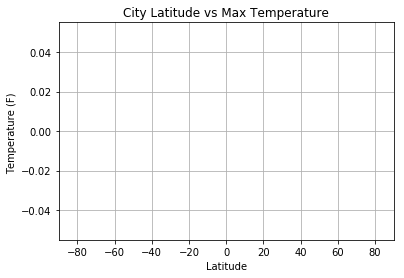

In [23]:
# Build a scatter plot for each data type

# Latitude vs Max Temp
plt.scatter(weather_data["lat"], weather_data["temp"], color = "blue")

# Add chart labels
plt.title("City Latitude vs Max Temperature")
plt.ylabel("Temperature (F) ")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-90,90)

# Save the figure
plt.savefig("Latitude_vs_MaxTemperature.png")
# Show plot
plt.show()

#### Latitude vs. Humidity Plot

In [ ]:
#scatter plots are not a problem at all -- the problem is that I cant access the data via my code!


#### Latitude vs. Cloudiness Plot

#### Latitude vs. Wind Speed Plot